In [1]:
import xarray as xr
import pandas as pd
import geopandas as gpd
import pygrib
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import itertools
from functools import reduce

In [2]:
##user-input:
home_dir = "/Users/pedrogalarza/Documents/NYU-MSDS/2020_fall/DSGA-1001/Project-Wildfire/"
data_dir = os.path.join(home_dir, 'wildfires-1001/data/')

In [3]:
#State of Califonria
ca_boundary_path = os.path.join(data_dir, 'clean_data/CA_boundary', 'CA_boundary.shp')
CA_boundaries_gdf = gpd.read_file(ca_boundary_path)

#CA grid map
county_grid_path = os.path.join(data_dir, 'clean_data/county_grid/county_grid.shp')
county_grid_gdf = gpd.read_file(county_grid_path)

In [4]:
#grib gdf
grib_gdf = pd.read_pickle('ERA5_master1980_gdf.pkl')

In [5]:
grib_gdf.head()

,LATITUDE,LONGITUDE,date,10 metre U wind component hrs:0,10 metre V wind component hrs:0,2 metre dewpoint temperature hrs:0,2 metre temperature hrs:0,"Leaf area index, high vegetation hrs:0","Leaf area index, low vegetation hrs:0",Surface pressure hrs:0,...,Total precipitation hrs:12,10 metre U wind component hrs:18,10 metre V wind component hrs:18,2 metre dewpoint temperature hrs:18,2 metre temperature hrs:18,"Leaf area index, high vegetation hrs:18","Leaf area index, low vegetation hrs:18",Surface pressure hrs:18,Total precipitation hrs:18,geometry
0,42.09,-125.17,1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-13933860.663 5174470.556)
1,42.09,-125.07,1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-13922728.714 5174470.556)
2,42.09,-124.97,1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-13911596.764 5174470.556)
3,42.09,-124.87,1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-13900464.815 5174470.556)
4,42.09,-124.77,1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-13889332.866 5174470.556)


In [8]:
grib_gdf_slice=grib_gdf[(grib_gdf["date"]==datetime.datetime(1981,1,1,))]

In [9]:
grib_CAslice_df = gpd.sjoin(county_grid_gdf[["GRID_ID","geometry"]], grib_gdf_slice, op = 'contains', how='left').drop(["index_right","LATITUDE","LONGITUDE"],axis=1)
grib_CAslice_df = grib_CAslice_df.groupby(["GRID_ID","date"]).mean().reset_index()
#grib_CAslice_df = grib_CAslice_df.drop(["index_left","FID"],axis=1)
grib_CAslice_df

,GRID_ID,date,10 metre U wind component hrs:0,10 metre V wind component hrs:0,2 metre dewpoint temperature hrs:0,2 metre temperature hrs:0,"Leaf area index, high vegetation hrs:0","Leaf area index, low vegetation hrs:0",Surface pressure hrs:0,Total precipitation hrs:0,...,Surface pressure hrs:12,Total precipitation hrs:12,10 metre U wind component hrs:18,10 metre V wind component hrs:18,2 metre dewpoint temperature hrs:18,2 metre temperature hrs:18,"Leaf area index, high vegetation hrs:18","Leaf area index, low vegetation hrs:18",Surface pressure hrs:18,Total precipitation hrs:18
0,0.0,1981-01-01,-0.277989,0.574512,279.448020,283.653232,3.333563,0.283641,95801.681818,0.007159,...,95756.715909,0.003542,-1.277423,0.667903,277.902810,280.914684,3.333563,0.283641,95891.517045,0.005958
1,1.0,1981-01-01,-0.418503,0.581143,279.948597,284.004128,3.541970,0.602128,96517.409091,0.007817,...,96473.079545,0.003710,-1.360525,0.787943,278.400146,281.457342,3.541970,0.602128,96612.971591,0.006502
2,2.0,1981-01-01,-0.427689,1.013210,280.173691,284.388496,3.335967,0.841594,97227.100000,0.009517,...,97195.345000,0.005039,-1.024032,0.910016,279.540967,282.228672,3.335967,0.841594,97330.382500,0.008037
3,3.0,1981-01-01,-0.248194,1.120674,280.439551,284.540283,3.621655,0.619934,97291.800000,0.010309,...,97249.825000,0.005727,-1.121938,0.902640,279.608838,282.390820,3.621655,0.619934,97394.162500,0.008941
4,6.0,1981-01-01,-0.378960,0.309132,276.192952,281.228662,2.485518,0.358643,90747.266667,0.006494,...,90718.258333,0.002976,-0.803260,0.280586,274.943571,277.740576,2.485518,0.358643,90829.729167,0.005219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,142.0,1981-01-01,0.797337,-0.260615,276.722726,287.481062,3.474932,2.005652,92186.071429,0.001202,...,92180.910714,0.000333,-0.173728,-0.017645,275.257551,286.850185,3.474932,2.005652,92372.812500,0.000566
130,144.0,1981-01-01,0.847457,0.256278,270.701229,287.100500,0.219849,0.509073,91087.970588,0.000692,...,91085.742647,0.000381,-0.147206,0.202583,271.022504,283.518066,0.219849,0.509073,91294.297794,0.000453
131,145.0,1981-01-01,0.887354,-0.158408,271.363188,287.404622,0.000000,0.509630,91396.809524,0.000674,...,91404.410714,0.000399,-0.004911,0.036400,271.727132,284.343622,0.000000,0.509630,91609.538690,0.000464
132,146.0,1981-01-01,0.520645,-0.182600,272.517829,288.628069,0.000000,0.508949,92986.842857,0.000685,...,92994.767857,0.000372,0.336845,-0.278102,272.945319,285.354841,0.000000,0.508949,93213.091071,0.000450


In [10]:
grib_CAgrid_df = gpd.sjoin(county_grid_gdf[["GRID_ID","geometry"]], grib_gdf, op = 'contains', how='left').drop(["index_right","LATITUDE","LONGITUDE"],axis=1)
grib_CAgrid_df = grib_CAgrid_df.groupby(["GRID_ID","date"]).mean().reset_index()
#grib_CAslice_df = grib_CAslice_df.drop(["index_left","FID"],axis=1)
grib_CAgrid_df

,GRID_ID,date,10 metre U wind component hrs:0,10 metre V wind component hrs:0,2 metre dewpoint temperature hrs:0,2 metre temperature hrs:0,"Leaf area index, high vegetation hrs:0","Leaf area index, low vegetation hrs:0",Surface pressure hrs:0,Total precipitation hrs:0,...,Surface pressure hrs:12,Total precipitation hrs:12,10 metre U wind component hrs:18,10 metre V wind component hrs:18,2 metre dewpoint temperature hrs:18,2 metre temperature hrs:18,"Leaf area index, high vegetation hrs:18","Leaf area index, low vegetation hrs:18",Surface pressure hrs:18,Total precipitation hrs:18
0,0.0,1981-01-01,-0.277989,0.574512,279.448020,283.653232,3.333563,0.283641,95801.681818,0.007159,...,95756.715909,3.541677e-03,-1.277423,0.667903,277.902810,280.914684,3.333563,0.283641,95891.517045,0.005958
1,0.0,1981-02-01,0.856878,0.350710,278.492654,283.110729,3.774381,0.284185,96059.295455,0.005799,...,96075.170455,2.601292e-03,-0.889262,0.966776,277.088312,280.927379,3.774381,0.284185,96164.732955,0.004747
2,0.0,1981-03-01,1.496192,-0.302391,277.721436,282.804688,3.795688,0.284291,95870.170455,0.007790,...,95861.096591,3.884414e-03,0.073013,0.010019,276.848300,281.523815,3.795688,0.284291,95950.261364,0.005877
3,0.0,1981-04-01,2.140229,-2.212483,279.540727,284.527899,3.997037,0.284440,96203.772727,0.001706,...,96147.369318,9.203719e-04,1.233414,-1.337485,278.054688,283.983132,3.997037,0.284440,96225.164773,0.001310
4,0.0,1981-05-01,2.195972,-2.211979,280.653875,286.384011,4.629217,0.285373,96014.005682,0.001870,...,95956.250000,1.246637e-03,1.759611,-1.697442,279.806130,286.216597,4.629217,0.285373,95981.392045,0.001528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,147.0,1989-08-01,-0.406003,2.574393,276.883845,308.969747,0.000000,0.512003,94501.939286,0.000872,...,94683.703571,1.703841e-04,-0.652851,0.304324,281.710491,304.785728,0.000000,0.512003,94812.571429,0.000693
14468,147.0,1989-09-01,0.109532,1.278142,273.141009,307.235205,0.000000,0.509389,94538.019643,0.000032,...,94709.837500,4.727141e-06,-0.112103,-0.457329,275.739042,303.318206,0.000000,0.509389,94863.778571,0.000017
14469,147.0,1989-10-01,0.143265,0.217420,269.976618,299.676200,0.000000,0.507685,94870.414286,0.000034,...,95030.494643,4.732581e-07,0.689226,-1.200611,272.134103,296.153599,0.000000,0.507685,95186.191071,0.000027
14470,147.0,1989-11-01,0.531128,-0.966756,265.848242,294.856124,0.000000,0.507420,95025.851786,0.000007,...,95135.776786,1.215341e-06,0.974334,-1.360698,266.818011,291.399491,0.000000,0.507420,95308.455357,0.000002


In [11]:
grib_CAgrid_df.to_pickle('ERA5_CAgrid1980_gdf.pkl')

In [12]:
county_grid_gdf

,NAME,COUNTYFP,GEOID,ALAND,AWATER,COUNTY_ARE,GRID_AREA,GRID_ID,COUNTY_GRI,COUNTY_G_1,geometry
0,Plumas,063,06063,6612400993,156387635,1.155000e+10,5.041000e+09,49.0,4.936293e+09,0.427385,"POLYGON ((-13502275.000 4897930.000, -13431275..."
1,Sierra,091,06091,2468694587,23299110,4.200450e+09,5.041000e+09,50.0,1.535563e+09,0.365571,"POLYGON ((-13502275.000 4826930.000, -13431275..."
2,Sierra,091,06091,2468694587,23299110,4.200450e+09,5.041000e+09,65.0,2.544187e+09,0.605694,"POLYGON ((-13431275.000 4826930.000, -13360275..."
3,Sacramento,067,06067,2499183617,76073827,4.205267e+09,5.041000e+09,39.0,2.029400e+09,0.482585,"POLYGON ((-13573275.000 4684930.000, -13502275..."
4,Contra Costa,013,06013,1871930816,209819213,3.351027e+09,5.041000e+09,40.0,1.618024e+09,0.482844,"POLYGON ((-13573275.000 4613930.000, -13502275..."
...,...,...,...,...,...,...,...,...,...,...,...
129,Tulare,107,06107,12495016292,37081410,1.929486e+10,5.041000e+09,98.0,4.535463e+09,0.235061,"POLYGON ((-13289275.000 4400930.000, -13218275..."
130,Tehama,103,06103,7639720404,32276063,1.313738e+10,5.041000e+09,25.0,4.171626e+09,0.317539,"POLYGON ((-13644275.000 4897930.000, -13573275..."
131,Butte,007,06007,4238423343,105325812,7.340035e+09,5.041000e+09,36.0,2.479630e+09,0.337823,"POLYGON ((-13573275.000 4897930.000, -13502275..."
132,Stanislaus,099,06099,3874642752,46376455,6.250517e+09,5.041000e+09,54.0,3.614684e+09,0.578302,"POLYGON ((-13502275.000 4542930.000, -13431275..."


In [13]:
grib_county_join = county_grid_gdf[["GRID_ID","geometry"]].merge(grib_CAgrid_df, on = "GRID_ID")
grib_county_join

,GRID_ID,geometry,date,10 metre U wind component hrs:0,10 metre V wind component hrs:0,2 metre dewpoint temperature hrs:0,2 metre temperature hrs:0,"Leaf area index, high vegetation hrs:0","Leaf area index, low vegetation hrs:0",Surface pressure hrs:0,...,Surface pressure hrs:12,Total precipitation hrs:12,10 metre U wind component hrs:18,10 metre V wind component hrs:18,2 metre dewpoint temperature hrs:18,2 metre temperature hrs:18,"Leaf area index, high vegetation hrs:18","Leaf area index, low vegetation hrs:18",Surface pressure hrs:18,Total precipitation hrs:18
0,49.0,"POLYGON ((-13502275.000 4897930.000, -13431275...",1981-01-01,-0.106545,0.457258,272.322824,277.757282,2.060066,0.938665,84698.471429,...,84671.567857,0.003288,-0.490888,0.273120,271.841274,275.139662,2.060066,0.938665,84786.433929,0.004790
1,49.0,"POLYGON ((-13502275.000 4897930.000, -13431275...",1981-02-01,0.160980,0.426413,272.040116,277.152253,2.088058,0.938892,84759.321429,...,84782.396429,0.001856,-0.506618,0.310006,269.993213,274.608315,2.088058,0.938892,84878.558929,0.002390
2,49.0,"POLYGON ((-13502275.000 4897930.000, -13431275...",1981-03-01,0.598120,0.573028,272.210610,279.244866,2.128648,0.939392,84437.625000,...,84461.873214,0.002266,-0.039907,0.515295,271.413260,277.414558,2.128648,0.939392,84540.996429,0.003568
3,49.0,"POLYGON ((-13502275.000 4897930.000, -13431275...",1981-04-01,0.974116,0.730775,272.933601,286.495027,2.312967,0.941581,84691.842857,...,84672.130357,0.000513,0.082492,0.524338,272.729688,284.540918,2.312967,0.941581,84759.437500,0.000936
4,49.0,"POLYGON ((-13502275.000 4897930.000, -13431275...",1981-05-01,1.756463,0.693661,273.916636,289.815444,2.749337,0.946245,84522.158929,...,84548.678571,0.001221,0.579024,0.383421,274.027030,287.941483,2.749337,0.946245,84570.823214,0.001660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,58.0,"POLYGON ((-13459049.115 4187930.000, -13459122...",1989-08-01,2.902802,0.718667,284.941333,296.659717,1.725269,2.107690,97657.175000,...,97682.525000,0.000004,1.270209,0.414650,284.832373,295.717041,1.725269,2.107690,97789.700000,0.000008
14468,58.0,"POLYGON ((-13459049.115 4187930.000, -13459122...",1989-09-01,2.568159,0.047804,285.454370,295.951855,1.629053,2.099307,97615.462500,...,97669.937500,0.000483,0.943390,-0.088098,285.170605,294.764453,1.629053,2.099307,97798.300000,0.000579
14469,58.0,"POLYGON ((-13459049.115 4187930.000, -13459122...",1989-10-01,1.654897,0.023256,282.995679,293.219458,1.541052,2.089389,97951.550000,...,98036.787500,0.000572,-0.186897,-0.199914,282.402490,291.866577,1.541052,2.089389,98158.262500,0.000765
14470,58.0,"POLYGON ((-13459049.115 4187930.000, -13459122...",1989-11-01,0.859211,-0.987396,280.128027,292.065039,1.475848,2.082098,98026.637500,...,98120.362500,0.000356,-0.782722,-1.249479,279.496631,289.606763,1.475848,2.082098,98224.512500,0.000358


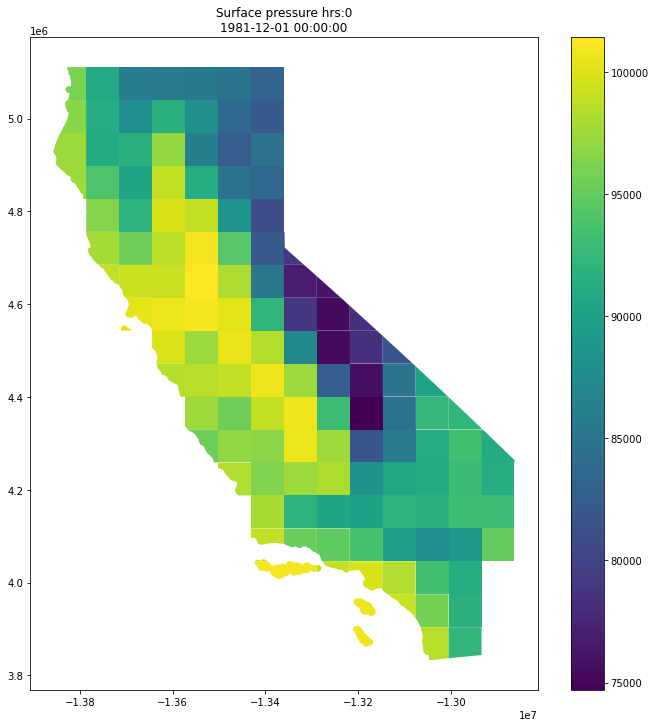

In [15]:
test_date = datetime.datetime(1981,12,1,)
test_feature = 'Surface pressure hrs:0'
grib_county_join[grib_county_join["date"]==test_date].plot(column=test_feature,figsize = (12,12), legend=True)
plt.title(test_feature +"\n" +str(test_date))
plt.show()

In [16]:
grib_county_join[grib_county_join["date"]==test_date]

,GRID_ID,geometry,date,10 metre U wind component hrs:0,10 metre V wind component hrs:0,2 metre dewpoint temperature hrs:0,2 metre temperature hrs:0,"Leaf area index, high vegetation hrs:0","Leaf area index, low vegetation hrs:0",Surface pressure hrs:0,...,Surface pressure hrs:12,Total precipitation hrs:12,10 metre U wind component hrs:18,10 metre V wind component hrs:18,2 metre dewpoint temperature hrs:18,2 metre temperature hrs:18,"Leaf area index, high vegetation hrs:18","Leaf area index, low vegetation hrs:18",Surface pressure hrs:18,Total precipitation hrs:18
11,49.0,"POLYGON ((-13502275.000 4897930.000, -13431275...",1981-12-01,0.444099,0.871865,273.395354,276.424519,2.196631,0.940142,84684.841071,...,84730.360714,0.004321,0.077220,0.909463,272.338253,275.308970,2.196631,0.940142,84830.875000,0.006265
119,50.0,"POLYGON ((-13502275.000 4826930.000, -13431275...",1981-12-01,0.376092,1.027892,276.030036,279.343590,2.373113,0.674962,88541.412500,...,88587.532143,0.006446,-0.351505,0.898407,274.832129,278.714104,2.373113,0.674962,88689.503571,0.009140
227,65.0,"POLYGON ((-13431275.000 4826930.000, -13360275...",1981-12-01,0.978674,1.189155,271.874414,275.387207,2.483940,1.180048,80927.545833,...,80957.141667,0.003448,0.731990,1.358079,270.855778,274.979574,2.483940,1.180048,81067.708333,0.004785
335,39.0,"POLYGON ((-13573275.000 4684930.000, -13502275...",1981-12-01,0.176155,0.651692,281.618262,286.130566,1.871440,1.909737,101408.379167,...,101492.041667,0.001609,0.166650,0.265513,280.573486,283.523324,1.871440,1.909737,101626.941667,0.002545
443,40.0,"POLYGON ((-13573275.000 4613930.000, -13502275...",1981-12-01,0.479732,0.305020,281.712712,286.372559,2.369080,1.588920,101036.412500,...,101117.908333,0.001225,0.414387,0.194473,280.846940,283.916178,2.369080,1.588920,101251.241667,0.001967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13943,98.0,"POLYGON ((-13289275.000 4400930.000, -13218275...",1981-12-01,0.497569,-0.035169,279.741671,283.827225,1.999794,1.995234,92994.898214,...,93060.846429,0.001292,0.426135,0.096974,277.814495,282.898200,1.999794,1.995234,93186.417857,0.001969
14051,25.0,"POLYGON ((-13644275.000 4897930.000, -13573275...",1981-12-01,-0.766346,0.806375,280.140055,284.402181,1.961027,1.830625,98925.779167,...,99019.408333,0.001947,-0.473340,0.840318,279.083187,283.010677,1.961027,1.830625,99130.008333,0.003693
14159,36.0,"POLYGON ((-13573275.000 4897930.000, -13502275...",1981-12-01,-0.186589,0.888712,276.842220,280.297217,2.245581,0.661422,91259.145833,...,91309.775000,0.004919,-0.715919,0.903526,275.770378,279.434391,2.245581,0.661422,91417.141667,0.007476
14267,54.0,"POLYGON ((-13502275.000 4542930.000, -13431275...",1981-12-01,0.049711,-0.133509,281.098717,286.560303,1.983883,1.962966,100541.441071,...,100627.332143,0.000771,0.265072,0.038035,280.247907,284.107408,1.983883,1.962966,100759.875000,0.001218


NameError: name 'grib_CAslice_gdf' is not defined

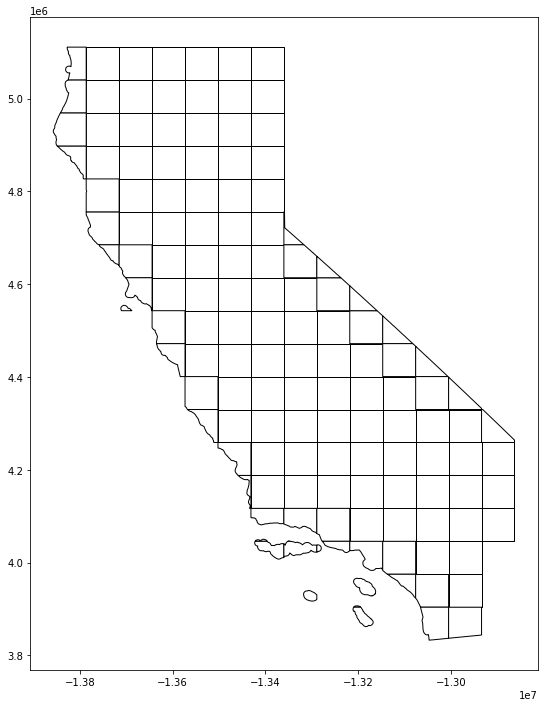

In [17]:
ax1 =county_grid_gdf.plot(color='white', edgecolor='black',figsize=(12,12))
grib_CAslice_gdf.plot(ax = ax1,column="Surface pressure hrs:18",markersize=3,figsize=(15,15))
#plt.title("Leaf area index, high vegetation hrs:18")
plt.show()

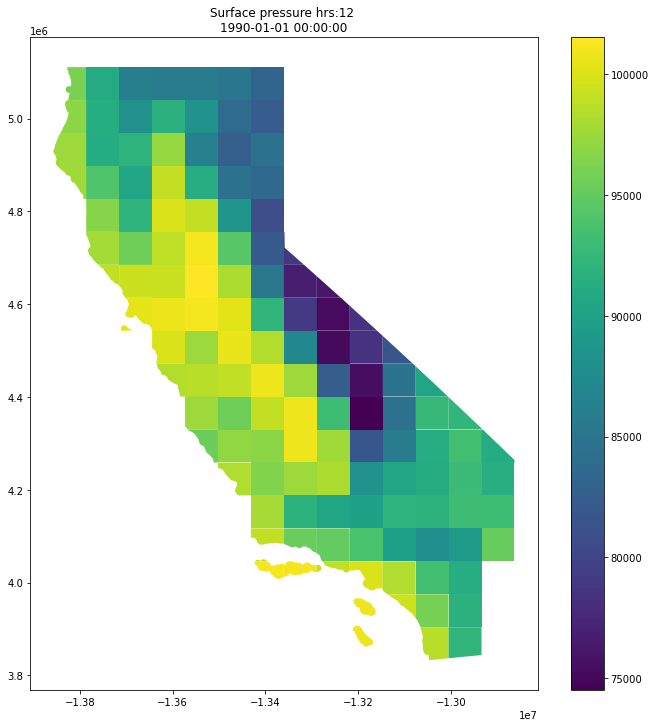

In [84]:
grib_county_join.plot(column='Surface pressure hrs:12',figsize = (12,12), legend=True)
plt.title("Surface pressure hrs:12 \n" +str(datetime.datetime(1990,1,1,)))
plt.show()

In [55]:
county_grid_gdf

,NAME,COUNTYFP,GEOID,ALAND,AWATER,COUNTY_ARE,GRID_AREA,GRID_ID,COUNTY_GRI,COUNTY_G_1,geometry
0,Plumas,063,06063,6612400993,156387635,1.155000e+10,5.041000e+09,49.0,4.936293e+09,0.427385,"POLYGON ((-13502275.000 4897930.000, -13431275..."
1,Sierra,091,06091,2468694587,23299110,4.200450e+09,5.041000e+09,50.0,1.535563e+09,0.365571,"POLYGON ((-13502275.000 4826930.000, -13431275..."
2,Sierra,091,06091,2468694587,23299110,4.200450e+09,5.041000e+09,65.0,2.544187e+09,0.605694,"POLYGON ((-13431275.000 4826930.000, -13360275..."
3,Sacramento,067,06067,2499183617,76073827,4.205267e+09,5.041000e+09,39.0,2.029400e+09,0.482585,"POLYGON ((-13573275.000 4684930.000, -13502275..."
4,Contra Costa,013,06013,1871930816,209819213,3.351027e+09,5.041000e+09,40.0,1.618024e+09,0.482844,"POLYGON ((-13573275.000 4613930.000, -13502275..."
...,...,...,...,...,...,...,...,...,...,...,...
129,Tulare,107,06107,12495016292,37081410,1.929486e+10,5.041000e+09,98.0,4.535463e+09,0.235061,"POLYGON ((-13289275.000 4400930.000, -13218275..."
130,Tehama,103,06103,7639720404,32276063,1.313738e+10,5.041000e+09,25.0,4.171626e+09,0.317539,"POLYGON ((-13644275.000 4897930.000, -13573275..."
131,Butte,007,06007,4238423343,105325812,7.340035e+09,5.041000e+09,36.0,2.479630e+09,0.337823,"POLYGON ((-13573275.000 4897930.000, -13502275..."
132,Stanislaus,099,06099,3874642752,46376455,6.250517e+09,5.041000e+09,54.0,3.614684e+09,0.578302,"POLYGON ((-13502275.000 4542930.000, -13431275..."
